## Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Dataset

In [2]:
df = pd.read_csv("bank.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


   ## Description:
   The data is related with direct marketing campaigns of a Portuguese banking institution.<br/> 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br/> 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 


   ## Input variables:

<ul> 
    <li>1 - age (numeric)</li>
    <li>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services") </li>
    <li>3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
    <li>4 - education (categorical: "unknown","secondary","primary","tertiary")</li>
    <li>5 - default: has credit in default? (binary: "yes","no")</li>
    <li>6 - balance: average yearly balance, in euros (numeric) </li>
    <li>7 - housing: has housing loan? (binary: "yes","no")</li>
    <li>8 - loan: has personal loan? (binary: "yes","no")</li>
   <li>9 - contact: contact communication type (categorical: "unknown","telephone","cellular") </li>
   <li>10 - day: last contact day of the month (numeric)</li>
   <li>11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</li>
   <li>12 - duration: last contact duration, in seconds (numeric) </li>
   <li>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
   <li>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not     previously contacted)</li>
   <li>15 - previous: number of contacts performed before this campaign and for this client (numeric)</li>
   <li>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
   <li>17 - y - has the client subscribed a term deposit? (binary: "yes","no")</li>
</ul>

### Total Information

In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### binary columns

In [5]:
binary_columns = ['default', 'housing', 'loan', 'y']
for column in binary_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0}).astype('int64')

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


### Numeric vs Categorical

In [7]:
numeric_data = df.select_dtypes(include=['int64'])
numeric_data


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1
45209,57,0,668,0,0,17,508,4,-1,0,0


In [8]:
numeric_data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown
...,...,...,...,...,...,...
45206,technician,married,tertiary,cellular,nov,unknown
45207,retired,divorced,primary,cellular,nov,unknown
45208,retired,married,secondary,cellular,nov,success
45209,blue-collar,married,secondary,telephone,nov,unknown


### Duplicated values

In [10]:
df.duplicated().sum()

0

### Missing Values

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data Distribution per column

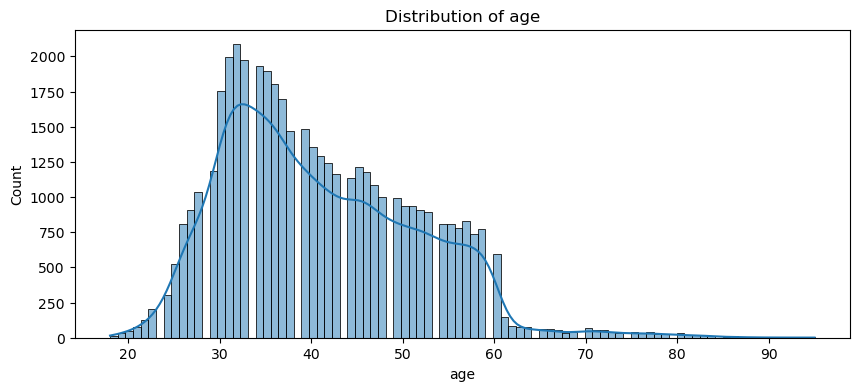

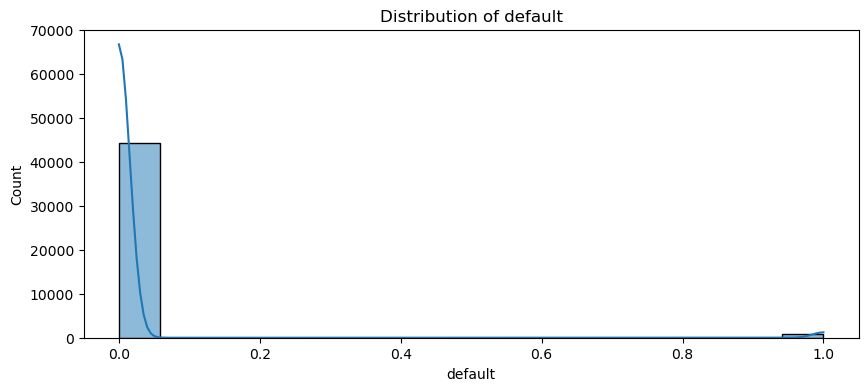

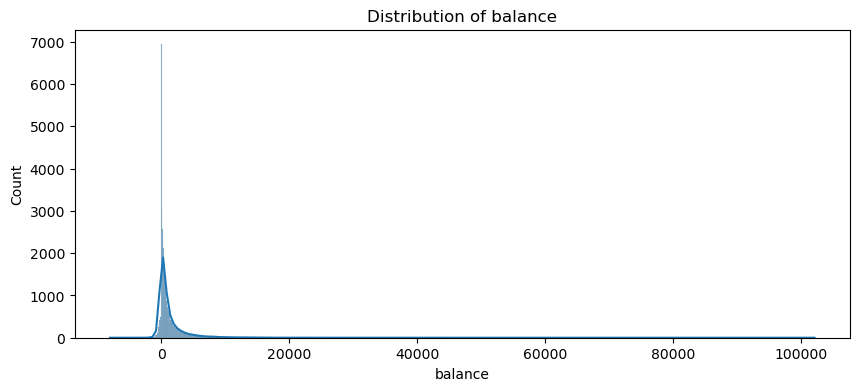

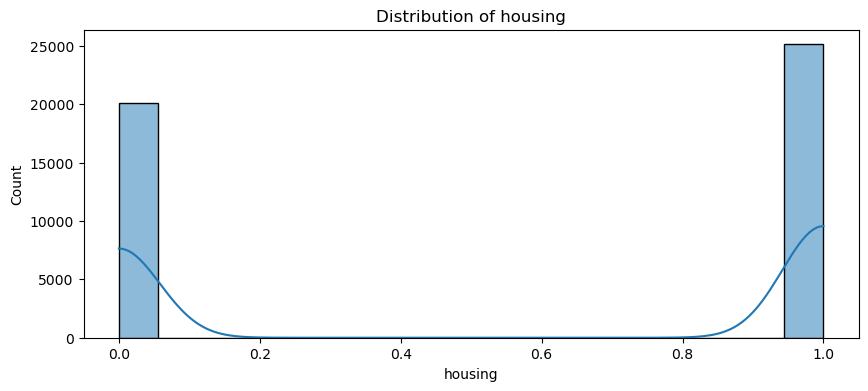

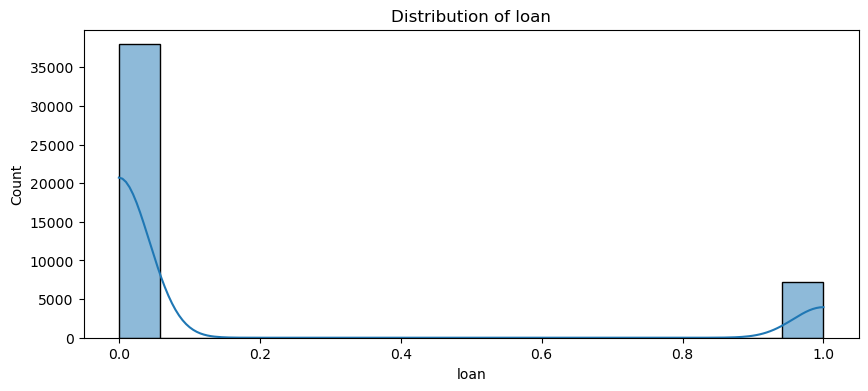

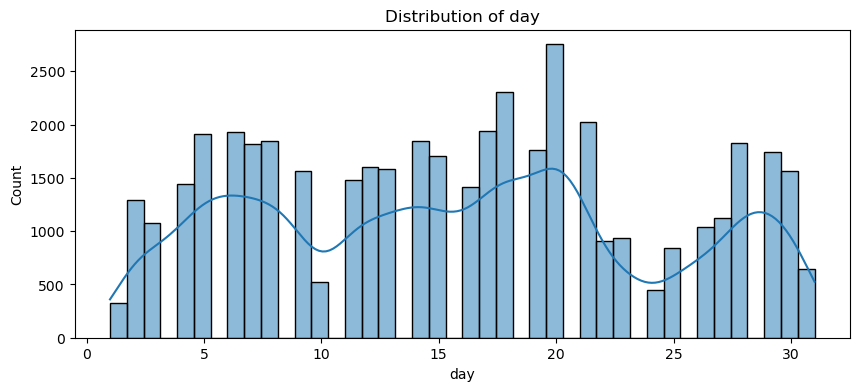

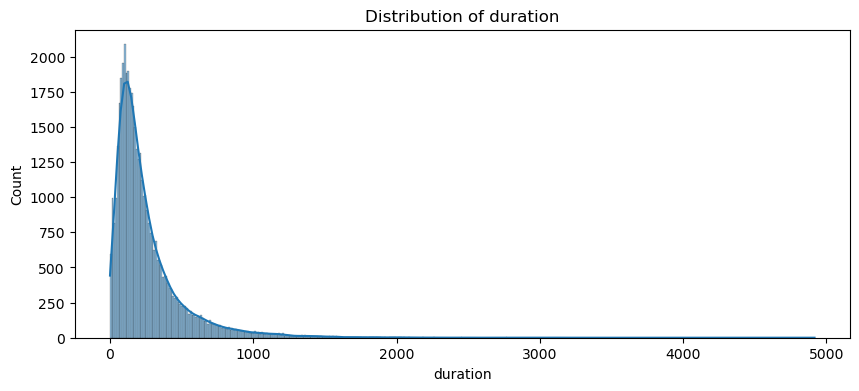

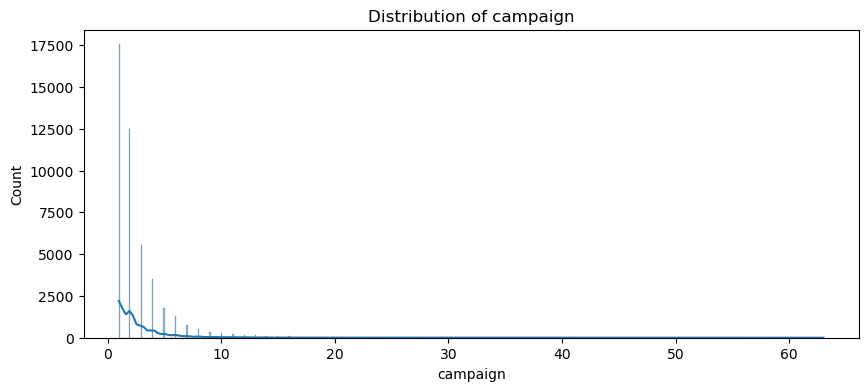

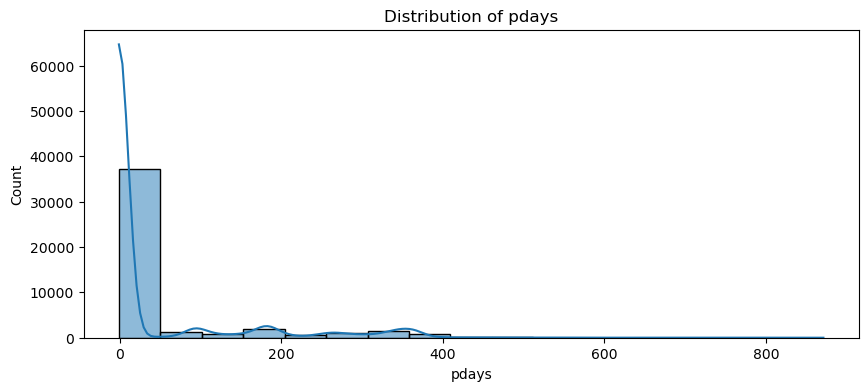

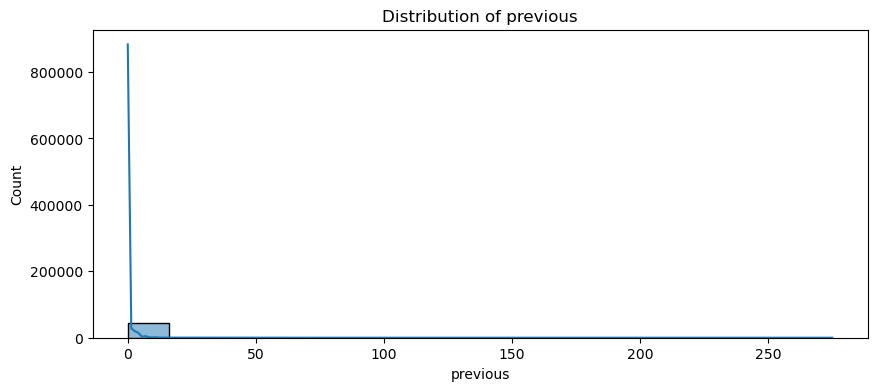

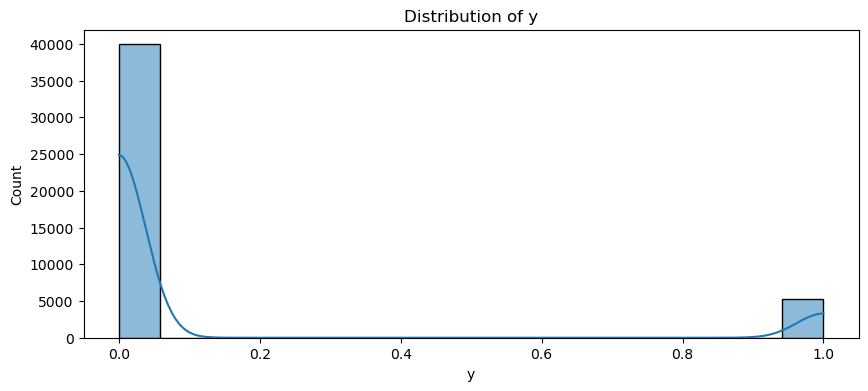

In [12]:
num_features = numeric_data.columns
for feature in num_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

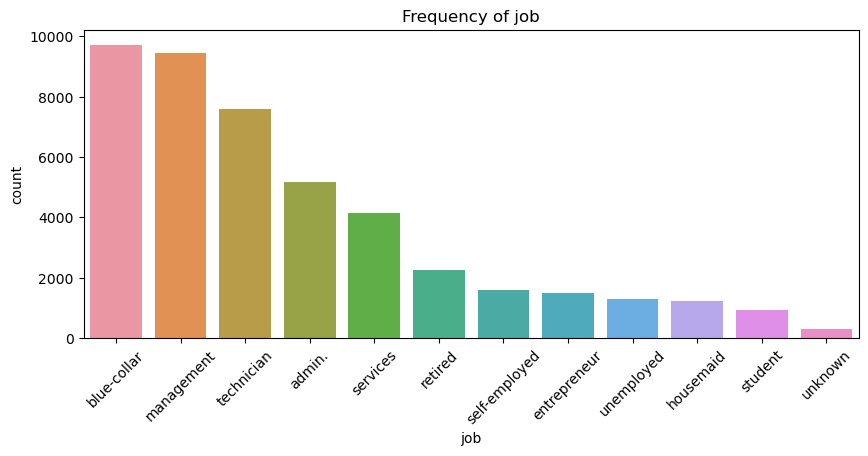

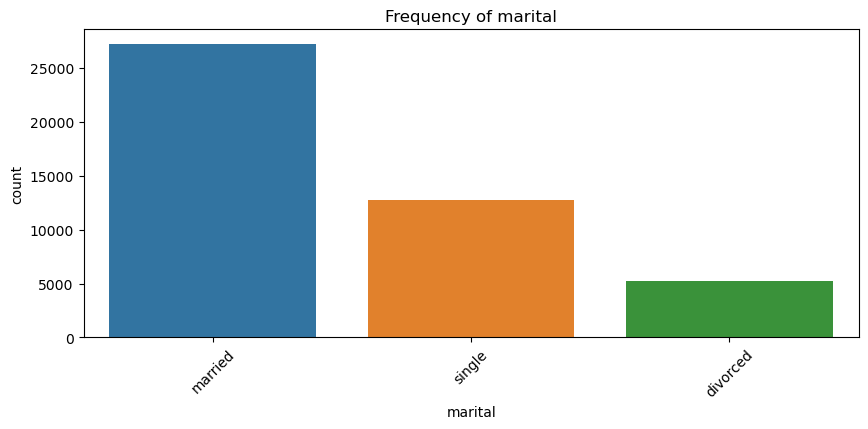

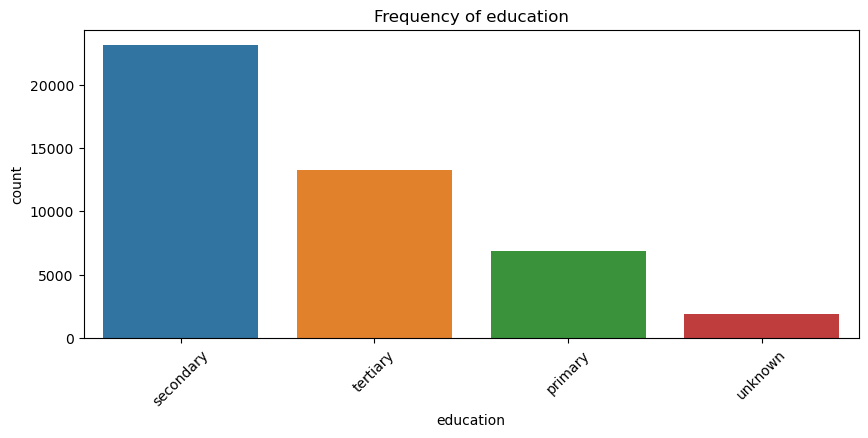

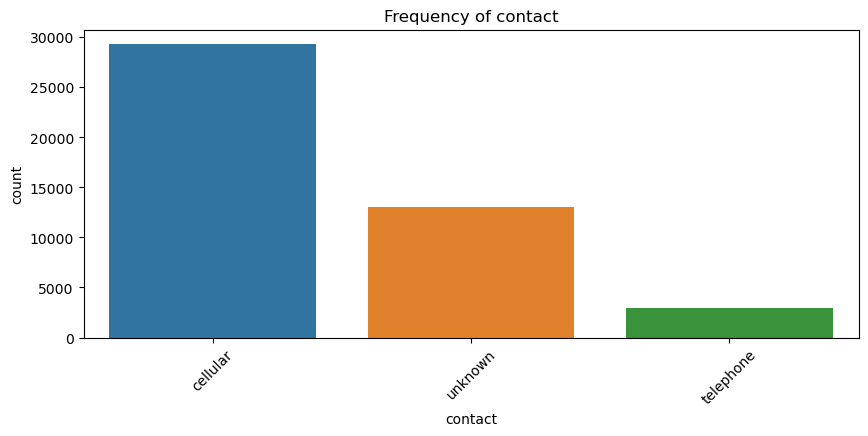

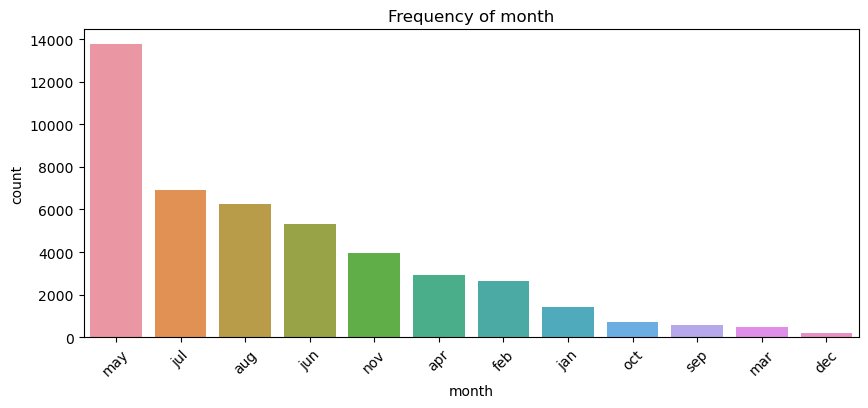

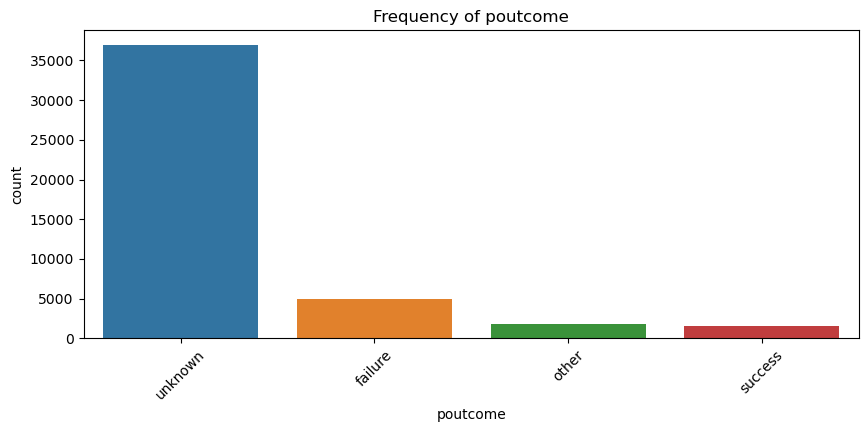

In [13]:
cat_features = categorical_data.columns
for feature in cat_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[feature], order = df[feature].value_counts().index)
    plt.title(f'Frequency of {feature}')
    plt.xticks(rotation=45)
    plt.show()

### Checking unkown values
1.job,
2.education,
3.contact,
4.poutcome

In [14]:
categorical_data.columns

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [15]:
def count_unknown_rows(df, column):
    return len(df.loc[df[column] == "unknown"])

for column in categorical_data.columns:
    count = count_unknown_rows(df, column)
    print(f"Number of rows with unknown values for '{column}' column: {count}")

Number of rows with unknown values for 'job' column: 288
Number of rows with unknown values for 'marital' column: 0
Number of rows with unknown values for 'education' column: 1857
Number of rows with unknown values for 'contact' column: 13020
Number of rows with unknown values for 'month' column: 0
Number of rows with unknown values for 'poutcome' column: 36959


In [16]:
def print_value_counts(df, columns):
    for column in columns:
        print(f'{column}\n', df[column].value_counts())
        print('============================')
columns_to_check=['job','education','contact','poutcome']
print_value_counts(df, columns_to_check)

job
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
education
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
contact
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
poutcome
 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


### Checking  Outliers

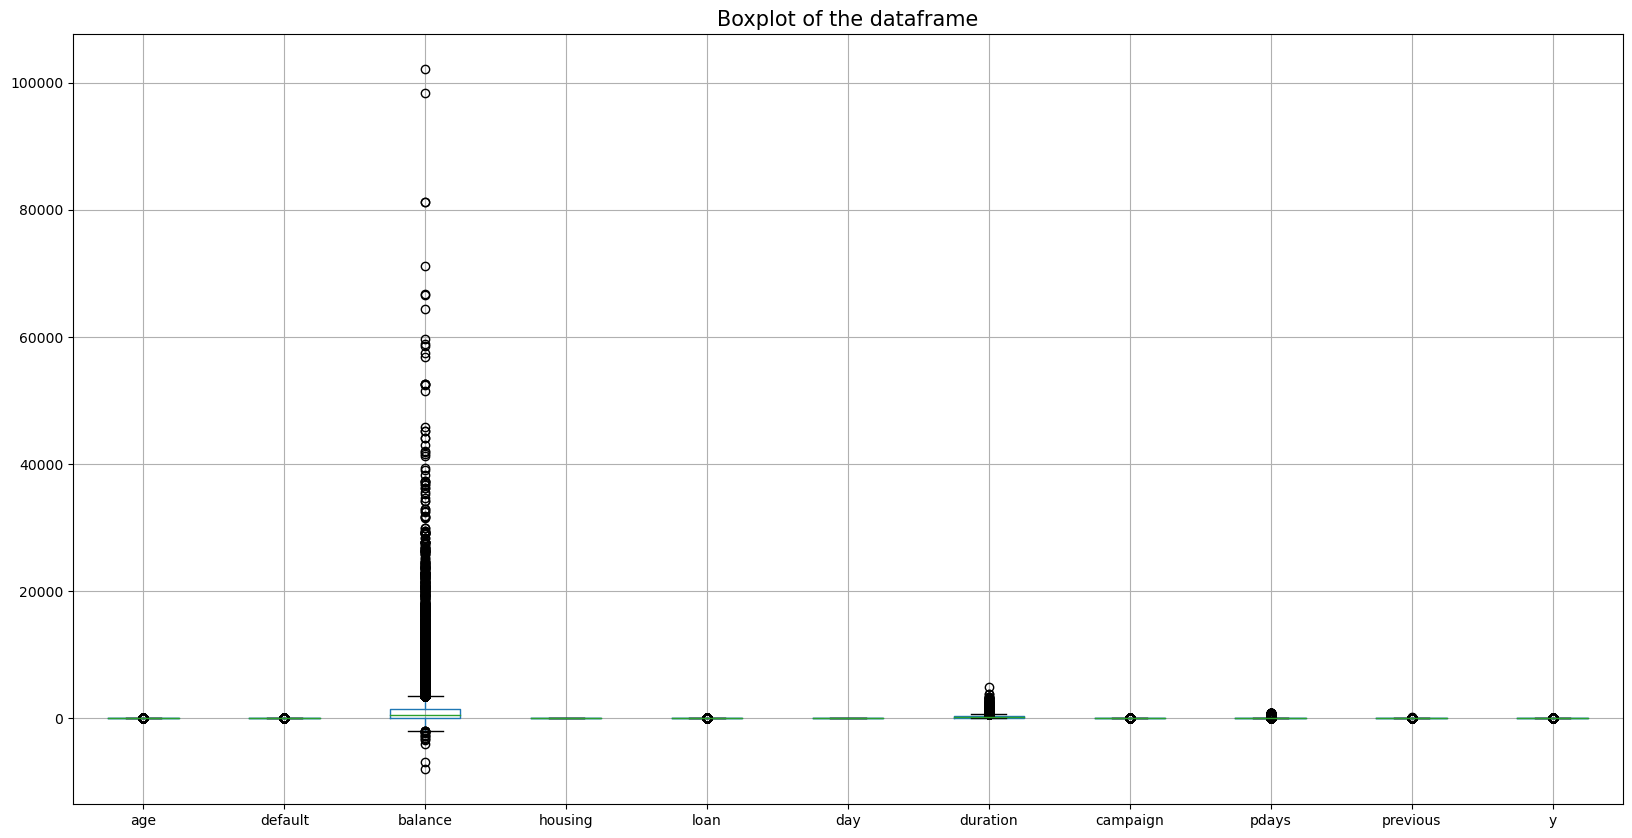

In [17]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

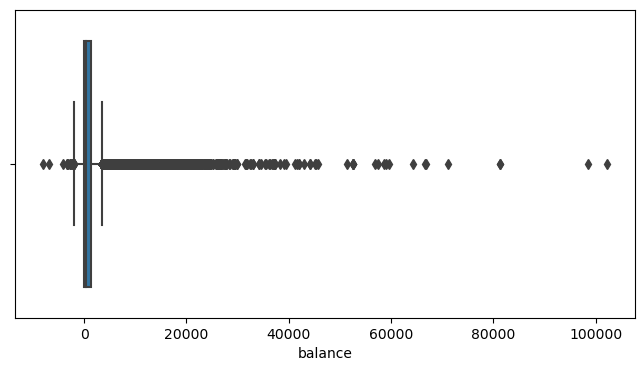

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['balance'])
plt.show()

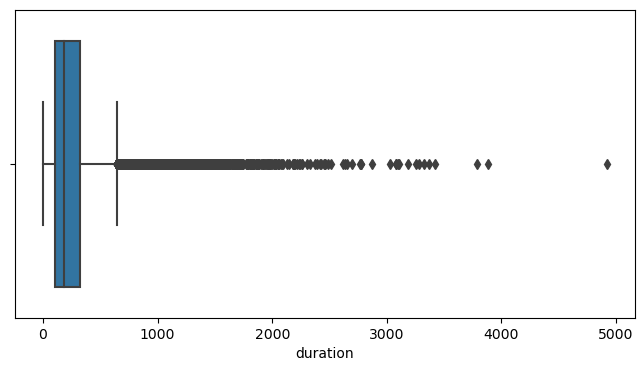

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

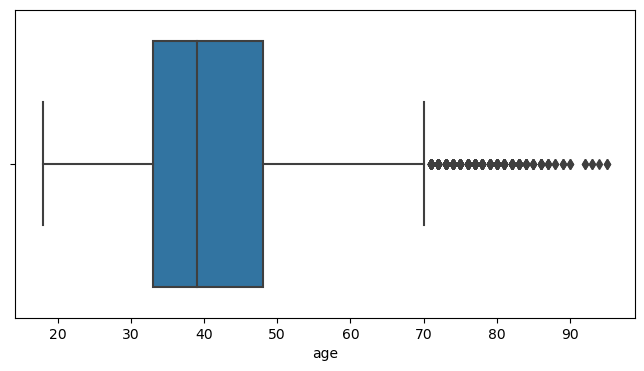

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.show()

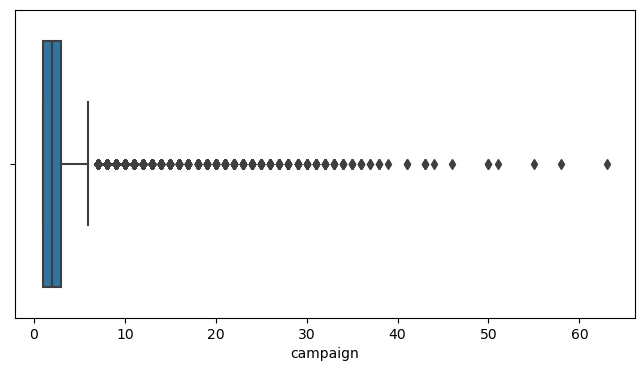

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['campaign'])
plt.show()


It seems that columns : balance, age, duration and campaign have outliers.

In [22]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]

    return df


columns_to_check = ['balance', 'duration', 'age', 'campaign']
df = remove_outliers_iqr(df, columns_to_check)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,0,113,0,0,cellular,17,nov,266,1,-1,0,unknown,1
45205,25,technician,single,secondary,0,505,0,1,cellular,17,nov,386,2,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


### Corelations

In [23]:
#sns.pairplot(data=numeric_data)
plt.show()

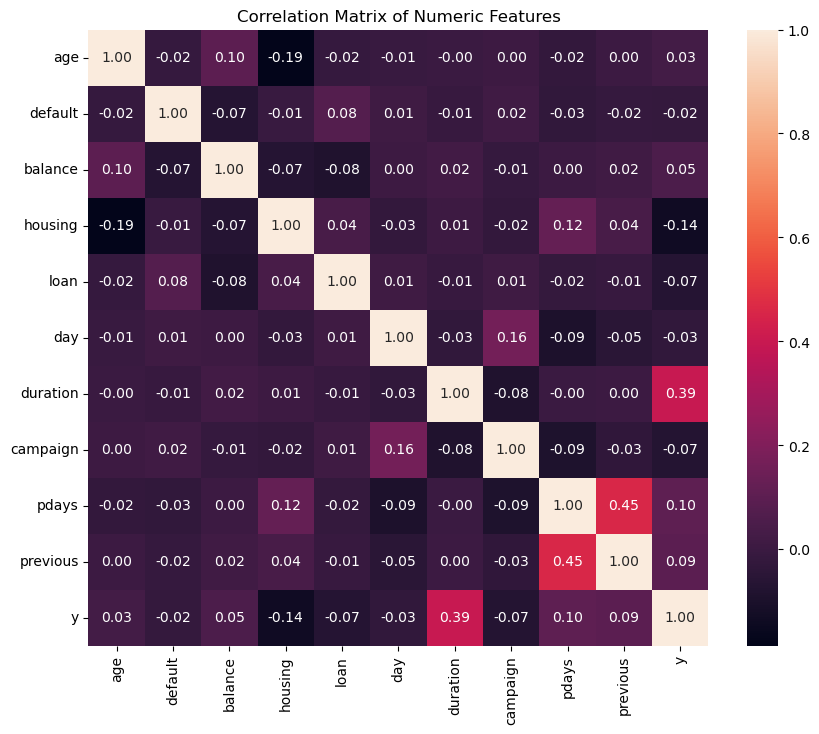

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Analysis of categorical features

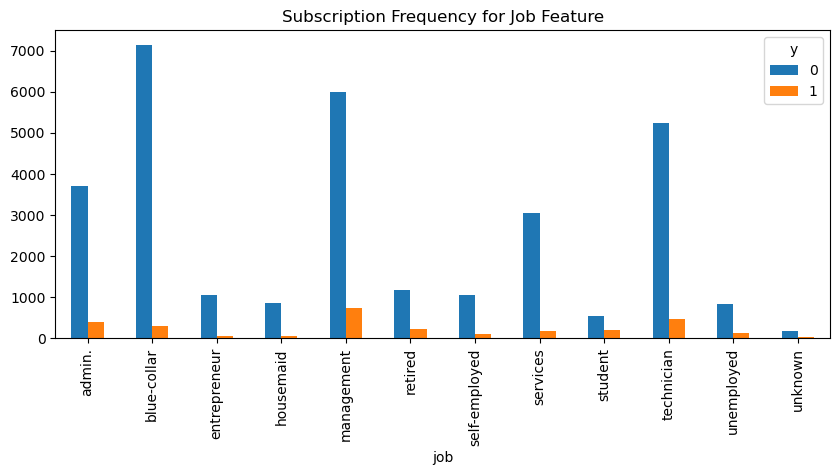

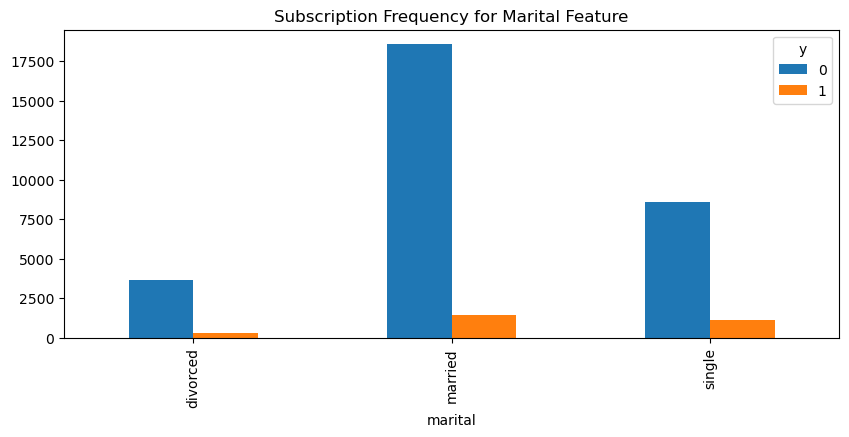

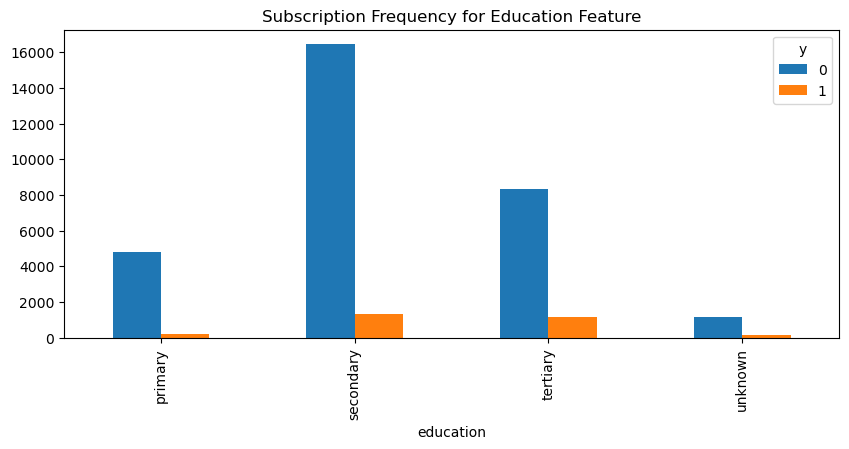

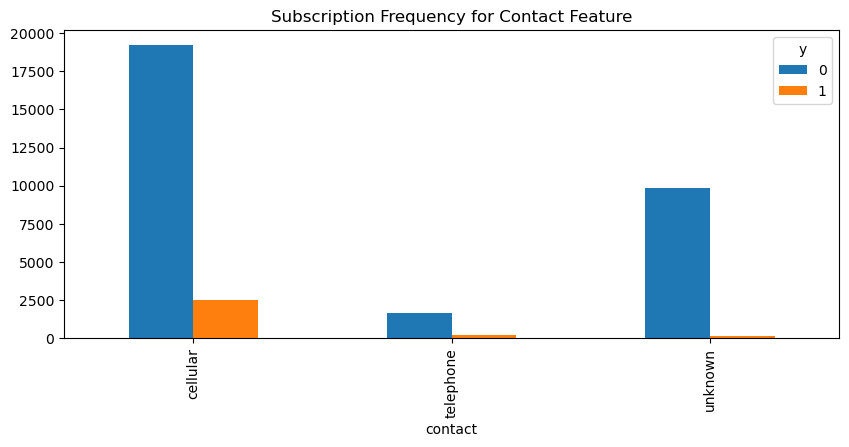

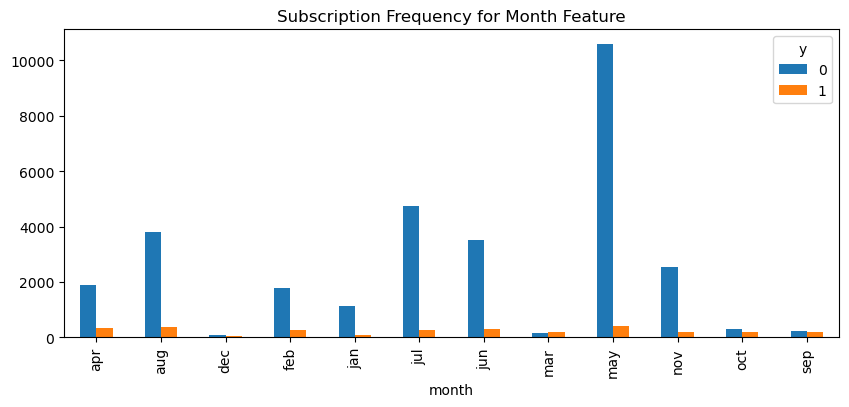

In [25]:
for feature in cat_features[:-1]:  
    crosstab = pd.crosstab(df[feature], df['y'])
    crosstab.plot(kind='bar', figsize=(10, 4))
    plt.title(f'Subscription Frequency for {feature.capitalize()} Feature')
    plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33605 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33605 non-null  int64 
 1   job        33605 non-null  object
 2   marital    33605 non-null  object
 3   education  33605 non-null  object
 4   default    33605 non-null  int64 
 5   balance    33605 non-null  int64 
 6   housing    33605 non-null  int64 
 7   loan       33605 non-null  int64 
 8   contact    33605 non-null  object
 9   day        33605 non-null  int64 
 10  month      33605 non-null  object
 11  duration   33605 non-null  int64 
 12  campaign   33605 non-null  int64 
 13  pdays      33605 non-null  int64 
 14  previous   33605 non-null  int64 
 15  poutcome   33605 non-null  object
 16  y          33605 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 4.6+ MB


### Splitting Dataset

In [27]:
X = df.drop('y', axis=1)
y = df['y']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [29]:
numerical_features=['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous']

categorical_features=['marital', 'education', 'contact', 'month', 'poutcome']


unknown_features=['job','education']

In [30]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


unknown_impute_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values='unknown',strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('unknown', unknown_impute_transformer, unknown_features)
    ])

## Models

### Logesting Regression

In [31]:
logreg_model = LogisticRegression()

logreg_param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': [ 0.1, 1, 10, 100]
}
logreg_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', logreg_model)])
logreg_grid_search = GridSearchCV(logreg_model_pipeline, logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train, y_train)


logreg_y_pred = logreg_grid_search.predict(X_test)


print("\nLogistic Regression:")
print('===============================================================')
print(f"Best Parameters: {logreg_grid_search.best_params_}")
print('===============================================================')
print("Accuracy:", accuracy_score(y_test, logreg_y_pred))
print('===============================================================')
print("\nClassification Report:")
print(classification_report(y_test, logreg_y_pred))



Logistic Regression:
Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Accuracy: 0.9263502454991817

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6153
           1       0.64      0.29      0.40       568

    accuracy                           0.93      6721
   macro avg       0.79      0.64      0.68      6721
weighted avg       0.91      0.93      0.91      6721



In [45]:
log_roc_auc = roc_auc_score(y_test, logreg_y_pred)
log_roc_auc

0.6361724098859368

### GradientBoosting

In [32]:
gb_model = GradientBoostingClassifier()

gb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}
gb_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', gb_model)])
gb_random_search = RandomizedSearchCV(gb_model_pipeline, gb_param_grid, cv=5, scoring='accuracy',n_iter=10,random_state=42)
gb_random_search.fit(X_train, y_train)

gb_random_y_pred = gb_random_search.predict(X_test)


print("\nGradient Boosting with Randomized Search:")
print('===============================================================')
print(f"Best Parameters: {gb_random_search.best_params_}")
print('===============================================================\n')
print("Accuracy:", accuracy_score(y_test, gb_random_y_pred))
print('===============================================================\n')
print("\nClassification Report:")
print(classification_report(y_test, gb_random_y_pred))



Gradient Boosting with Randomized Search:
Best Parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}

Accuracy: 0.9312602291325696


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6153
           1       0.66      0.38      0.48       568

    accuracy                           0.93      6721
   macro avg       0.80      0.68      0.72      6721
weighted avg       0.92      0.93      0.92      6721



In [46]:
gb_roc_auc = roc_auc_score(y_test, gb_random_y_pred)
gb_roc_auc

0.6796040749617157

### Xgboost

In [33]:
xgb_model = xgb.XGBClassifier()

xgb_param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 4, 5]
}

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', xgb_model)])

xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)


xgb_y_pred = xgb_grid_search.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

print("\nXGBoost:")
print("==================================================================")
print(f"Best Parameters: {xgb_grid_search.best_params_}")
print("==================================================================")
print("Accuracy:", xgb_accuracy)
print("==================================================================")
print("calssification_report\n",classification_report(y_test, xgb_y_pred))



XGBoost:
Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Accuracy: 0.9321529534295492
calssification_report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      6153
           1       0.65      0.42      0.51       568

    accuracy                           0.93      6721
   macro avg       0.80      0.70      0.74      6721
weighted avg       0.92      0.93      0.93      6721



In [47]:
xb_roc_auc = roc_auc_score(y_test, xgb_y_pred)
xb_roc_auc

0.6984691138869622

### Catboost

In [34]:
catboost_model = CatBoostClassifier(verbose=0)

catboost_param_grid = {
    'classifier__iterations': [50, 100, 150],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__depth': [3, 4, 5]
}

catboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', catboost_model)])

catboost_grid_search = GridSearchCV(catboost_pipeline, catboost_param_grid, cv=5, scoring='accuracy')
catboost_grid_search.fit(X_train, y_train)


catboost_y_pred = catboost_grid_search.predict(X_test)


catboost_accuracy = accuracy_score(y_test, catboost_y_pred)


print("\nCatBoost:")
print('=======================================================')
print(f"Best Parameters: {catboost_grid_search.best_params_}")
print('=======================================================')
print("Accuracy:", catboost_accuracy)
print('=======================================================')
print("calssification_report\n",classification_report(y_test, catboost_y_pred))


CatBoost:
Best Parameters: {'classifier__depth': 3, 'classifier__iterations': 200, 'classifier__learning_rate': 0.2}
Accuracy: 0.932748102960869
calssification_report
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      6153
           1       0.67      0.40      0.50       568

    accuracy                           0.93      6721
   macro avg       0.81      0.69      0.73      6721
weighted avg       0.92      0.93      0.92      6721



In [48]:
cat_roc_auc = roc_auc_score(y_test, catboost_y_pred)
cat_roc_auc

0.6892059123798536

### SVC

In [35]:
svc_model = SVC()

param_grid = {
    'classifier__C': [ 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
}

svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', svc_model)])


svm_random_search = RandomizedSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy',n_iter=1,random_state=42)

svm_random_search.fit(X_train, y_train)


best_params = svm_random_search.best_params_
best_svm_model = svm_random_search.best_estimator_


svm_y_pred = svm_random_search.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_y_pred)

print("SVM:")
print('=======================================================\n')
print(f"Best Parameters: {best_params}")
print('=======================================================\n')
print("Accuracy:", svm_accuracy)
print('=======================================================')
print("calssification_report\n",classification_report(y_test, svm_y_pred))

SVM:

Best Parameters: {'classifier__kernel': 'linear', 'classifier__gamma': 'scale', 'classifier__C': 0.1}

Accuracy: 0.9241184347567326
calssification_report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6153
           1       0.65      0.23      0.33       568

    accuracy                           0.92      6721
   macro avg       0.79      0.61      0.65      6721
weighted avg       0.91      0.92      0.91      6721



In [49]:
svc_roc_auc = roc_auc_score(y_test, svm_y_pred)
svc_roc_auc

0.6069877741992341

### RandomForest

In [36]:
rf_model = RandomForestClassifier()


rf_param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3,4]
}
rf_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', rf_model)])


rf_random_search=RandomizedSearchCV(gb_model_pipeline, gb_param_grid, cv=5, scoring='accuracy',n_iter=1,random_state=42)


rf_random_search.fit(X_train, y_train)
rf_y_pred = rf_random_search.predict(X_test)


print("\nRandom Forest:")
print('=======================================================\n')
print(f"Best Parameters: {rf_random_search.best_params_}")
print('=======================================================\n')
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print('=======================================================')
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest:

Best Parameters: {'classifier__n_estimators': 200, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01}

Accuracy: 0.9294747805386103

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6153
           1       0.77      0.24      0.36       568

    accuracy                           0.93      6721
   macro avg       0.85      0.62      0.66      6721
weighted avg       0.92      0.93      0.91      6721



In [50]:
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)
rf_roc_auc

0.615506320059149

### KNN

In [39]:
knn_model = KNeighborsClassifier()

param_dist = {
    'classifier__n_neighbors': [3,5],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_model)
])

randomized_search_knn = RandomizedSearchCV(knn_pipeline, param_dist, n_iter=1, cv=5, scoring='accuracy', random_state=42)


randomized_search_knn.fit(X_train, y_train)


best_params_knn = randomized_search_knn.best_params_
best_model_knn = randomized_search_knn.best_estimator_




y_pred_knn = best_model_knn.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)




print("\nKnearestNeigbour:")
print('=======================================================\n')
print(f"Best Parameters: {best_params_knn}")
print('=======================================================\n')
print("Accuracy:", accuracy_knn)
print('=======================================================')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KnearestNeigbour:

Best Parameters: {'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 3}

Accuracy: 0.923225710459753

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6153
           1       0.59      0.31      0.41       568

    accuracy                           0.92      6721
   macro avg       0.76      0.64      0.68      6721
weighted avg       0.91      0.92      0.91      6721



In [51]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
knn_roc_auc

0.644853191961782